In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
from funciones import print_picture

#Load test file to see what's inside the files:
# file = uproot.open("ev{}.root".format(1))
file_path="/home/rodrigoa/NNDumper_Data/NNDumper_tree_00.root"
file = uproot.open(file_path)
tree = file["nndumper"]["evttree;5"] 
print("Contenido del TTree:")
tree.show()

Contenido del TTree:
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
TPCImgDataU          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
TPCImgWidthU         | int32_t                  | AsDtype('>i4')
TPCImgHeightU        | int32_t                  | AsDtype('>i4')
TPCImgDataV          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
TPCImgWidthV         | int32_t                  | AsDtype('>i4')
TPCImgHeightV        | int32_t                  | AsDtype('>i4')
TPCImgDataY          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
TPCImgWidthY         | int32_t                  | AsDtype('>i4')
TPCImgHeightY        | int32_t                  | AsDtype('>i4')
OpImgData0           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
OpImgData1           | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
OpImgWidth           |

In [2]:
#For big files, use lazy arrays instead -> Memory isn't infinite!

# lazyarray = uproot.lazy("ev{}.root".format(1)+":nndumper/evttree")
lazyarray = uproot.lazy(file_path+":nndumper/evttree;5")
NEvents=len(lazyarray)
h_TPC_U=lazyarray[0] ["TPCImgHeightU"]
w_TPC_U=lazyarray[0] ["TPCImgWidthU"]
h_TPC_V=lazyarray[0] ["TPCImgHeightV"]
w_TPC_V=lazyarray[0] ["TPCImgWidthV"]
h_TPC_Y=lazyarray[0] ["TPCImgHeightY"]
w_TPC_Y=lazyarray[0] ["TPCImgWidthY"]

w_Opt=lazyarray[0] ["OpImgWidth"]
h_Opt=lazyarray[0] ["OpImgHeight"]
i_type=lazyarray[0]["InteractionType"]


print("Numero de eventos en el .root file: ",NEvents)
print("Tamaño de las imagenes de TPC:",w_TPC_U,"x",h_TPC_U)
print("Tamaño de las imagenes opticas:",w_Opt,"x",h_Opt)#hay 96 canales ópticos, pero por simplicidad para la CNN colapsamos los canales enfrentados en el mismo: ch(6+7)...->96/2=48
print("Nº de canales opticos de PMT coated (VUV+VIS):",len(lazyarray[0]["SimPhotonsData"].to_numpy()))
print("Tipo de interaccion:",i_type) #1001 CCQE, lo demás, backgrounds (mirar interaction.png, cada numero es una interacción distinta)

Numero de eventos en el .root file:  4200
Tamaño de las imagenes de TPC: 248 x 200
Tamaño de las imagenes opticas: 48 x 600
Nº de canales opticos de PMT coated (VUV+VIS): 96
Tipo de interaccion: 1008


Imagenes de la TPC(e-)
Imagenes Opticas


<Figure size 432x288 with 0 Axes>

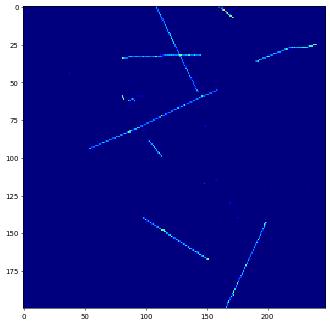

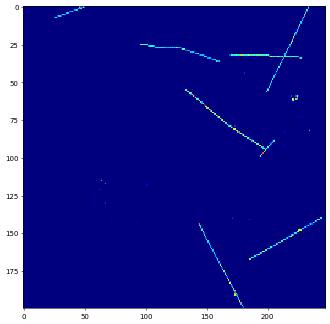

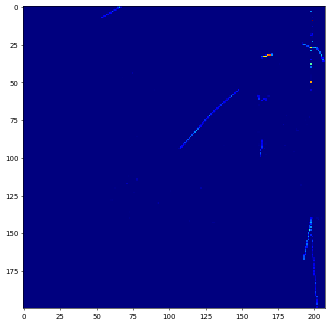

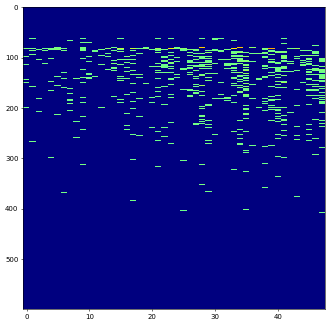

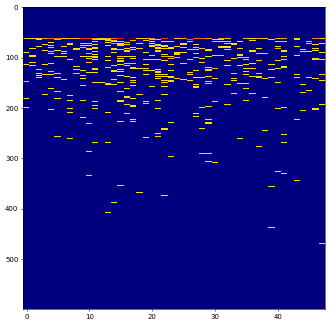

In [4]:
#Loop over the events in the run
# for i in range(NEvents):
for i in range(1):

    #print the carge(electrons) and light(photons) images 
    
    print(r"Imagenes de la TPC(e-)")
    plt.figure(figsize=(8, 8), dpi=50);
    print_picture(lazyarray[i]["TPCImgDataU"],h_TPC_U,w_TPC_U)

    plt.figure(figsize=(8, 8), dpi=50);
    print_picture(lazyarray[i]["TPCImgDataV"],h_TPC_V,w_TPC_V)

    plt.figure(figsize=(8, 8), dpi=50);
    print_picture(lazyarray[i]["TPCImgDataY"],h_TPC_Y,w_TPC_Y)


    print("Imagenes Opticas")
    plt.figure(figsize=(8, 8), dpi=50);
    print_picture(lazyarray[i]["OpImgData0"],h_Opt,w_Opt,op=True)

    plt.figure(figsize=(8, 8), dpi=50);
    print_picture(lazyarray[i]["OpImgData1"],h_Opt,w_Opt,op=True)



Text(0.5, 1.0, 'Tipos de interaccion: 1001 = CCQE(Señal)')

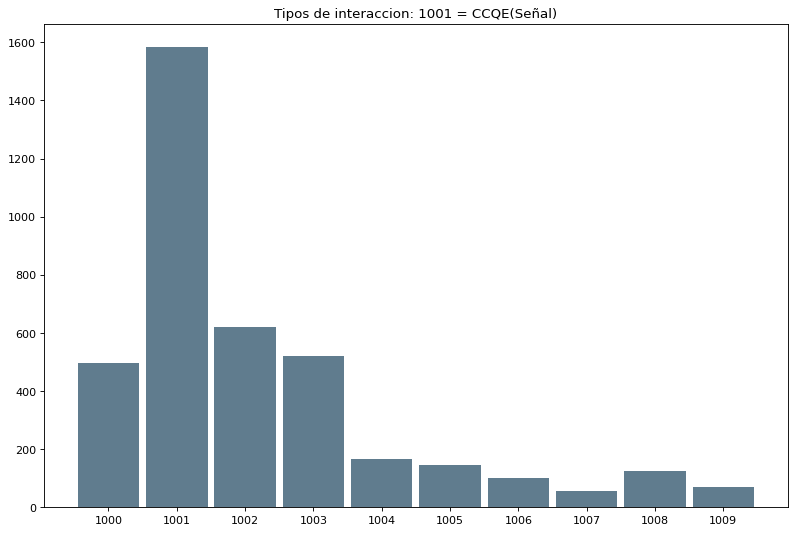

In [30]:
i_type=[];

for i in range(NEvents):
    i_type.append(lazyarray[i]["InteractionType"]);

plt.figure(figsize=( 12,8), dpi=80);
plt.hist(i_type,10,[999.5,1009.5],color='#607c8e',rwidth=0.9)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.title("Tipos de interaccion: 1001 = CCQE(Señal)")